In [1]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
import pandas as pd
from functions import plotTS, preprocess, create_model, model_train, kpis
import numpy as np

c:\Users\Greg\anaconda3\envs\nlp\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\Users\Greg\anaconda3\envs\nlp\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [22]:
deptId = 'Dept03'
path = 'Data/' + deptId
df_train = pd.read_csv(path + '/data_train.csv')
df_test = pd.read_csv(path + '/data_test.csv')
df_train = df_train.sort_values(by=['week'])
df_test = df_test.sort_values(by=['week'])
plotTS(df_train, ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], 'holInd', 'Sales by Week', ['sales'])
plotTS(df_test, ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], 'holInd', 'Sales by Week', ['sales'])

In [23]:
df_train = pd.read_csv(path + '/data_train.csv')
df_test = pd.read_csv(path + '/data_test.csv')

selected_features = ['week', 'holInd',
       'promoInd1', 'promoInd2', 'promoInd3', 'promoInd4', 'promoInd5',
       'woy', 'month', 'year', 'corrected_Temperature',
       'corrected_Fuel_Price', 'corrected_CPI', 'corrected_Unemployment',
       'temperature_class', 'fuel_price_class', 'cpi_class',
       'unemployment_class', 'meanSlsPerTmpClass', 'meanSlsPerFPClass',
       'meanSlsPerCPIClass', 'meanSlsPerUnemplClass', 'meanSlsPerWoY',
       'meanSlsPerMonth', 'medianSlsPerTmpClass', 'medianSlsPerFPClass',
       'medianSlsPerCPIClass', 'medianSlsPerUnemplClass', 'medianSlsPerWoY',
       'medianSlsPerMonth', 'stdSlsPerTmpClass', 'stdSlsPerFPClass',
       'stdSlsPerCPIClass', 'stdSlsPerUnemplClass', 'stdSlsPerWoY',
       'stdSlsPerMonth', 'varSlsPerTmpClass', 'varSlsPerFPClass',
       'varSlsPerCPIClass', 'varSlsPerUnemplClass', 'varSlsPerWoY',
       'varSlsPerMonth', 'madSlsPerTmpClass', 'madSlsPerFPClass',
       'madSlsPerCPIClass', 'madSlsPerUnemplClass', 'madSlsPerWoY',
       'madSlsPerMonth', 'maxSlsPerTmpClass', 'maxSlsPerFPClass',
       'maxSlsPerCPIClass', 'maxSlsPerUnemplClass', 'maxSlsPerWoY',
       'maxSlsPerMonth', 'minSlsPerTmpClass', 'minSlsPerFPClass',
       'minSlsPerCPIClass', 'minSlsPerUnemplClass', 'minSlsPerWoY',
       'minSlsPerMonth', 'sma', 'cma', 'ema', 'momentum', 'norm', 'kurtosis',
       'skew', 'sales']

x_train_feat, x_test_feat, y_train, y_test, train_feats = preprocess(df_train, df_test, selected_features)

model = create_model(x_train_feat.shape)

model, y_pred = model_train(model, x_train_feat, y_train, x_test_feat)

Epoch 10: early stopping
2/2 [==============================] - 0s 3ms/step


## KPIs

In [24]:
kpis(y_test, y_pred.ravel())

MAE:  169.7173327948937
MSE:  97875.23092095068
R2_Score:  -0.04788518821110954
MAPE:  0.19840424381443725


In [25]:
import plotly.express as px
d = {'week': np.array(df_test[['week']]).ravel(), 'Sales': y_test, 'Predicted': y_pred.ravel()}
tmp = pd.DataFrame(data=d)
fig = px.line(tmp, x='week', y=['Sales', 'Predicted'])
fig.show()

# Feature Importance

In [26]:
# Extract the weights of the input to hidden layer connections
weights = model.layers[0].get_weights()[0]
# Calculate the absolute sum of the weights for each feature
feature_importance = np.abs(np.sum(weights, axis=1))
# Normalize the feature importance values
feature_importance = feature_importance / np.sum(feature_importance)

# Create a dataframe with the feature importance values and their corresponding feature names
importance_df = pd.DataFrame({'feature': train_feats[1:-1], 'importance': feature_importance})

# Sort the dataframe by importance
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Plot the feature importance values using a bar plot
import plotly.graph_objs as go

trace = go.Bar(x=importance_df['feature'], y=importance_df['importance'])
layout = go.Layout(title='Feature Importance', xaxis=dict(title='Feature', tickangle=90), yaxis=dict(title='Importance'))
fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [27]:
importance_df[:10]['feature'].values

array(['corrected_Unemployment', 'unemployment_class',
       'medianSlsPerFPClass', 'momentum', 'varSlsPerWoY', 'norm',
       'medianSlsPerMonth', 'minSlsPerTmpClass', 'maxSlsPerTmpClass',
       'medianSlsPerWoY'], dtype=object)

In [28]:
df_train = pd.read_csv(path + '/data_train.csv')
df_test = pd.read_csv(path + '/data_test.csv')

selected_features = ['week','corrected_Unemployment', 'unemployment_class',
       'medianSlsPerFPClass', 'momentum', 'varSlsPerWoY', 'norm',
       'medianSlsPerMonth', 'minSlsPerTmpClass', 'maxSlsPerTmpClass',
       'medianSlsPerWoY', 'sales']

x_train_feat, x_test_feat, y_train, y_test, train_feats = preprocess(df_train, df_test, selected_features)

model = create_model(x_train_feat.shape)

model, y_pred = model_train(model, x_train_feat, y_train, x_test_feat)

Epoch 12: early stopping
2/2 [==============================] - 0s 3ms/step


In [29]:
kpis(y_test, y_pred.ravel())

MAE:  234.05127853292964
MSE:  147872.32883421582
R2_Score:  -0.5831709583071727
MAPE:  0.2691953669744146


In [30]:
import plotly.express as px
d = {'week': np.array(df_test[['week']]).ravel(), 'Sales': y_test, 'Predicted': y_pred.ravel()}
tmp = pd.DataFrame(data=d)
fig = px.line(tmp, x='week', y=['Sales', 'Predicted'])
fig.show()

In [31]:
import plotly.express as px
import pandas as pd

# Assuming you have a dataframe named "df"
tmp["error"] = tmp["Sales"] - tmp["Predicted"]

fig = px.bar(tmp, x="week", y="error")
fig.update_layout(title="Error per Week", xaxis_title="Week", yaxis_title="Error")
fig.show()


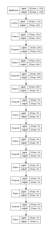

In [26]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

plt.imshow(plt.imread('model.png'))
plt.axis('off')
plt.show()
